## ANOVA Bidirecional

---

o teste A-B-C-D descrito é uma ANOVA “unidirecional” em que temos apenas um fator (grupo) que está variando. Poderíamos ter um segundo fator envolvido - digamos “fim de semana versus dia útil” - com dados coletados em cada combinação (grupo A dia útil, grupo B fim de semana etc.). Isso seria uma “ANOVA bidirecional”, e trataríamos isso de modo semelhante ao da ANOVA unidirecional, identificando o “efeito de interação”. Depois de identificar o efeito da média global e o efeito do tratamento, separamos as observação de fim de semana e dia útil de cada grupo e encontramos a diferença entre as médias para aqueles subconjuntos e a média do tratamento.

### Iderias-chafe

---

*   ANOVA é um procedimento estatístico para analisar os resultados de um experimento com múltiplos grupos
*   É a extensão de procedimentos semelhantes para o teste A/B, usado para avaliar se a variação global entre os grupos está dentro da taxa de variação do acaso
*   Um resultado últil de uma ANOVA é a identificação de componentes de variância associados com tratamentos de grupo, efeito de interações e erros

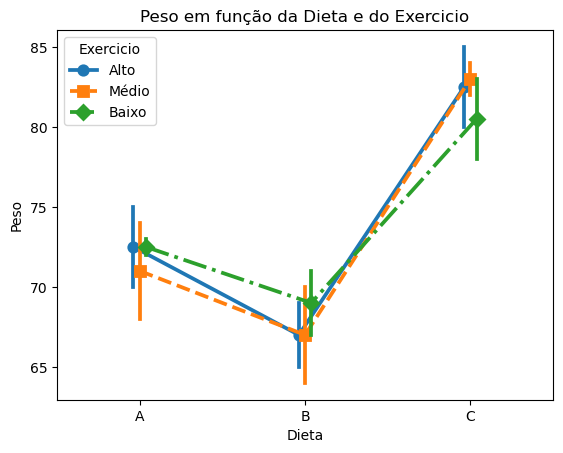

                           sum_sq   df          F    PR(>F)
C(Dieta)               648.444444  2.0  31.717391  0.000084
C(Exercicio)             0.444444  2.0   0.021739  0.978547
C(Dieta):C(Exercicio)   14.888889  4.0   0.364130  0.828301
Residual                92.000000  9.0        NaN       NaN


In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um DataFrame com dados fictícios
data = {
    'Dieta': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'] * 2,
    'Exercicio': ['Alto', 'Médio', 'Baixo'] * 6,
    'Peso': [70, 68, 72, 65, 64, 67, 80, 82, 78, 75, 74, 73, 69, 70, 71, 85, 84, 83]
}

df = pd.DataFrame(data)

# Visualizando os dados
sns.pointplot(x='Dieta', y='Peso', hue='Exercicio', data=df, dodge=True, markers=['o', 's', 'D'], linestyles=['-', '--', '-.'])
plt.title("Peso em função da Dieta e do Exercicio")
plt.show()

# ANOVA bidirecional
model = ols('Peso ~ C(Dieta) + C(Exercicio) + C(Dieta):C(Exercicio)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


### Explicação:

*   **Dieta**: 3 tipos de dieta (`A`, `B`, `C`).
*   **Exercicio**: 3 níveis de exercício (`Alto`, `Médio`, `Baixo`).
*   **Peso**: Peso dos indivíduos.

### ANOVA bidirecional:

*   O modelo inclui os efeitos principais de **Dieta** e **Exercicio**, assim como a interação entre os dois fatores (`C(Dieta):C(Exercicio)`).

O output da ANOVA fornecerá os valores F e p-valores, permitindo verificar a significância dos efeitos principais e da interação entre os fatores.